Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL410250 / EEL7513 / EEL7514 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$


# Exercício 2: Regressão Linear

Neste exercício você irá treinar um modelo de regressão linear e o usará para fazer predições. Além disso, você investigará a adição de novos atributos e a necessidade de regularização.

# Conjunto de dados

Para facilitar a análise, o conjunto de dados utilizado neste exercício possui um único atributo $x \in \RR$ (e um valor-alvo $y \in \RR$). Além desta peculiaridade, é importante ressaltar duas grandes diferenças em relação ao que se encontra em problemas reais:
- O conjunto de dados é sintético, isto é, gerado por simulação;
- O conjunto de treinamento tem tamanho **muito menor** que os conjuntos de validação e teste.

A razão para esta escolha é que um conjunto de treinamento pequeno nos permitirá observar mais facilmente o fenômeno de overfitting, enquanto conjuntos de validação e teste suficientemente grandes nos permitirão ter mais confiança na estimativa de desempenho do modelo medida nestes conjuntos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gen_data(n_samples, x_scale=[0,1], noise=0.5):
    '''Generate univariate regression dataset'''
    x = np.sort(np.random.rand(n_samples))
    y = 6*(-1/6 + x + (x > 1/3)*(2/3-2*x) + (x > 2/3)*(2*x-4/3)) + noise*np.random.randn(n_samples)
    x = x_scale[0] + (x_scale[1]-x_scale[0])*x
    X = x.reshape(-1,1)
    return X, y

def plot_data(X, y):
    '''Plot univariate regression dataset'''
    assert len(X.shape) == 2 and len(y.shape) == 1
    plt.plot(X[:,0],y,'b.'); plt.xlabel('x'); plt.ylabel('y');
    return

def plot_prediction(model, X, y, n_points=100):
    '''Plot dataset and predictions for a univariate regression model'''
    plot_data(X,y)
    if n_points is not None:
        xx = np.linspace(X.min(),X.max(),n_points)
        yy = model.predict(xx.reshape(-1,1))
        plt.plot(xx,yy,'r-')
    y_pred = model.predict(X)
    plt.plot(X[:,0],y_pred,'r.')
    plt.legend(['True', 'Predicted'])
    return

O conjunto de dados pode ser gerado e visualizado pelos comandos abaixo.

(30, 1) (30,)
(1000, 1) (1000,)
(1000, 1) (1000,)


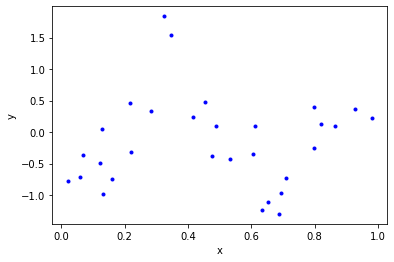

In [2]:
np.random.seed(2019*2)
X, y = gen_data(n_samples=30)
X_val, y_val = gen_data(n_samples=1000)
X_test, y_test = gen_data(n_samples=1000)

print(X.shape, y.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# Plot only the training data!
plot_data(X,y)

# 1. Regressão linear simples


1. Treine um modelo de regressão linear simples, $\hat{y} = w_0 + w_1 x$, sobre o conjunto de treinamento
1. Calcule o erro quadrático médio (MSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste
1. Trace o gráfico da predição sobre o conjunto de treinamento
1. Você diria que o modelo treinado está sofrendo de underfitting, overfitting ou nenhum dos dois? Explique.
1. (OPCIONAL) Experimente também a função [`model.score`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) do sklearn. Qual a relação entre este valor e o MSE? É possível calcular um a partir do outro? Como?

#### Dicas:
- Para traçar o gráfico, utilize a função `plot_prediction` fornecida acima
- Outras funções úteis:
```python
sklearn.linear_model.LinearRegression
sklearn.metrics.mean_squared_error
```

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)
predictTrain = model.predict(X)
predictTest = model.predict(X_test)

trainRMSE = (np.sqrt(mean_squared_error(y, predictTrain)))
testRMSE = (np.sqrt(mean_squared_error(y_test ,predictTest)))
print('Train RMSE:', trainRMSE)
print('Test RMSE:', testRMSE)


Train RMSE: 0.7192109231730063
Test RMSE: 0.7734279501954097


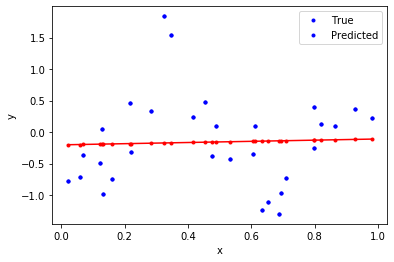

In [4]:
plot_data(X,y)
plot_prediction(model, X, y)

In [5]:
modScore = model.score(X,y)
print(modScore)
#Score bem baixo

0.0013485634441275929


# 2. Adicionando atributos (regressão linear com múltiplas variáveis)

Agora, estenderemos o modelo de regressão linear adicionando atributos polinomiais de grau até $d$, isto é, o modelo será dado por $\hat{y} = w_0 + w_1 x + w_2 x^2 + \cdots + w_d x^d$. Note que esse modelo possui um hiperparâmetro, $d$, que precisa ser determinado. **A boa prática recomenda nunca utilizar o conjunto de teste até que todos os hiperparâmetros sejam escolhidos**, utilizando, ao invés disso, o conjunto de validação.

1. Adicione atributos polinomiais ao modelo de regressão linear, escolha algum valor de $d$ e treine o modelo.
1. Calcule o erro quadrático médio (MSE) da predição sobre o conjunto de treinamento e sobre o **conjunto de validação**.
1. Trace o gráfico da predição sobre o conjunto de treinamento.
1. Repita os passos acima experimentando outros valores de $d$. O que você observa?
1. Especificamente, para o caso $d=12$, você diria que o modelo está sofrendo de underfitting, overfitting ou nenhum dos dois?

#### Dicas
- Para adicionar atributos polinomiais, use a função `sklearn.preprocessing.PolynomialFeatures` (leia sua [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)). Para combinar este pré-processamento (transformação de atributos) com o modelo de regressão linear (estimador) em um único modelo, utilize a função `sklearn.pipeline.make_pipeline` (leia sua [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)). Pode ser útil ler também os guias [https://scikit-learn.org/stable/getting_started.html] e [https://scikit-learn.org/stable/modules/compose.html] para ter uma visão geral do processo de encadeamento de pré-processamento e estimação.
- Não há necessidade de incluir o termo constante nos atributos adicionados, uma vez que o modelo de regressão linear já implementa a adição de coluna de 1's. Assim, utilize `PolynomialFeatures(d, include_bias=False)`.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import pipeline

def PolyRegression(d, X, y, X_val, y_val):
    p = PolynomialFeatures(d, include_bias=False)
    pipe = pipeline.make_pipeline(p, LinearRegression())
    reg = pipe.fit(X, y)
    predictTrain = reg.predict(X)
    predictTest = reg.predict(X_val)

    trainRMSE = (np.sqrt(mean_squared_error(y, predictTrain)))
    testRMSE = (np.sqrt(mean_squared_error(y_val ,predictTest)))
    return pipe, trainRMSE, testRMSE
    
for i in range(1, 19):
    pipe, trainRMSE, testRMSE = PolyRegression(i, X, y, X_val, y_val)
    print(f"d = {i}  Train RMSE: {trainRMSE}  Test RMSE: {testRMSE} ")
        
    

d = 1  Train RMSE: 0.7192109231730063  Test RMSE: 0.7752796567335274 
d = 2  Train RMSE: 0.7155387967268774  Test RMSE: 0.7821782909882687 
d = 3  Train RMSE: 0.5705247127618751  Test RMSE: 0.5787456996952536 
d = 4  Train RMSE: 0.5705188196901333  Test RMSE: 0.5788522847917862 
d = 5  Train RMSE: 0.42912346973338916  Test RMSE: 0.5588035608915332 
d = 6  Train RMSE: 0.4291158241079817  Test RMSE: 0.558611988255173 
d = 7  Train RMSE: 0.4058187955414304  Test RMSE: 0.5534876260597937 
d = 8  Train RMSE: 0.39633482032617984  Test RMSE: 0.5662470992007963 
d = 9  Train RMSE: 0.39028331652734904  Test RMSE: 0.5640943395290224 
d = 10  Train RMSE: 0.37896955064554827  Test RMSE: 0.5848630351949334 
d = 11  Train RMSE: 0.334569797104844  Test RMSE: 0.7043414798828416 
d = 12  Train RMSE: 0.33009463431264874  Test RMSE: 0.8226631337980139 
d = 13  Train RMSE: 0.32887830556482045  Test RMSE: 0.6515362824840236 
d = 14  Train RMSE: 0.30792850643854647  Test RMSE: 3.203910615019305 
d = 15  Tra

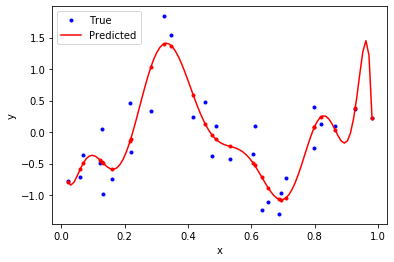

In [7]:
plot_prediction(PolyRegression(12, X, y, X_val, y_val)[0], X, y)

## Busca de hiperparâmetros

6. Trace um gráfico do MSE de treinamento e de validação em função do grau $d$. Se necessário, ajuste a escala vertical para melhor visualização.
1. Comente sobre o que você observa no gráfico. Em particular, explique o comportamento das duas curvas e por que esse comportamento era esperado.
1. Determine o valor de $d$ que minimiza o erro no conjunto de validação.
1. Para este valor de $d$, calcule o MSE de treinamento, de validação **e de teste** e trace o gráfico da predição (`plot_prediction`) sobre o conjunto de treinamento.
1. (OPCIONAL) O erro de validação parece representativo do erro de teste? O que você acha que aconteceria se o conjunto de validação fosse significativamente menor (por exemplo, com 30 amostras ao invés de 1000)?

#### Dicas:
- Funções úteis:
```python
np.arange() # retorna um array com separação uniforme (por exemplo, de inteiros)
np.zeros() # útil para pré-alocação de vetores
for i in range(len(v)): # percorre os elementos de v
plt.ylim() # ajusta a escala vertical
np.argmin() # encontra o índice do menor elemento do array
```

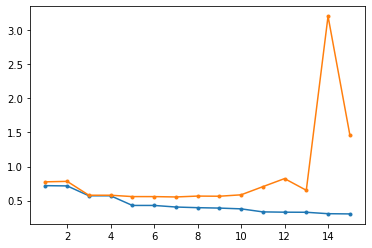

In [8]:
maxD = 15
dArray = np.arange(1, maxD+1)
MSETrainArray = np.zeros(maxD)
MSEValArray = np.zeros(maxD)

for i in dArray:
    MSETrainArray[i-1], MSEValArray[i-1] = PolyRegression(i, X, y, X_val, y_val)[1:]
plt.plot(dArray, MSETrainArray, ".-")
plt.plot(dArray, MSEValArray, ".-")

Grau do polinomio que minimiza a MSE de validação d = 7
MSE treino: 0.4291158241079817
MSE validação: 0.5534876260597937
MSE teste: 0.558988183398304


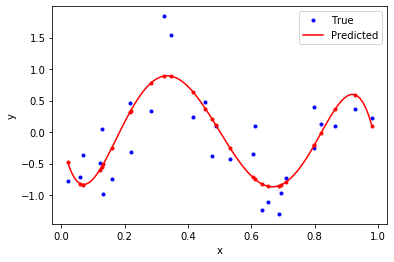

In [9]:
dMin = np.argmin(MSEValArray)
print(f"Grau do polinomio que minimiza a MSE de validação d = {dMin+1}")
pipe, MSETrain, MSETest = PolyRegression(dMin, X, y, X_test, y_test)
print(f"MSE treino: {MSETrain}")
print(f"MSE validação: {MSEValArray[dMin]}")
print(f"MSE teste: {MSETest}")

plot_prediction(pipe, X, y)

# 3. Regularização

Agora, adicionaremos regularização $\ell_2$ ao modelo, o que introduz mais um hiperparâmetro, o parâmetro de regularização $\lambda$.
**Para todos os itens abaixo, utilize o modelo com $d=12$.**

1. Retornando ao modelo com $d=12$, agora com regularização $\ell_2$ (*ridge regression*), experimente alguns valores de $\lambda$ e observe os resultados no gráfico da predição sobre o conjunto de treinamento. (Você logo perceberá a necessidade de usar $\lambda \ll 1$.) Em particular, o que acontece quando $\lambda$ é comparativamente grande?
1. Trace um gráfico do MSE de treinamento e de validação em função de $\log \lambda$. (Por que usar escala logarítmica?)
1. Comente sobre o que você observa no gráfico. Em particular, explique o comportamento das duas curvas em função de lambda (o que acontece em cada região) e por que esse comportamento era esperado.
1. Determine o valor de $\lambda$ que minimiza o erro no conjunto de validação.
1. Para este valor de $\lambda$, calcule o MSE de treinamento, de validação e de teste e trace o gráfico da predição (`plot_prediction`) sobre o conjunto de treinamento.
1. A partir destes resultados e do resultado do item 2.5, comente sobre o efeito da regularização em um modelo com capacidade elevada comparativamente ao tamanho do conjunto de treinamento.
1. (OPCIONAL) O que você acha que ocorreria se o conjunto de treinamento fosse relativamente grande (por exemplo, com 1000 amostras ao invés de 30)? Ainda seria importante regularizar?

#### Dicas

- Não utilize `lambda` como nome de variável, pois no Python `lambda` é uma palavra reservada (operador para criar funções anônimas). Uma sugestão é abreviar para `lamb`.

- Funções úteis:
```python
sklearn.linear_model.Ridge()
np.linspace()
np.exp()
np.log()
```
Note que o modelo `Ridge()` utiliza `alpha` (ao invés de $\lambda$) como parâmetro de regularização.

Train RMSE: 0.43009788870470056  Test RMSE: 0.54005095047949


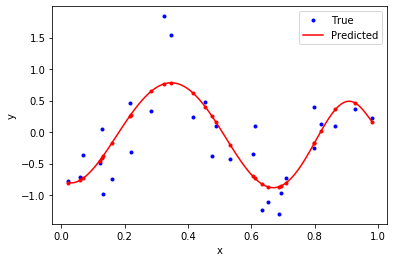

In [10]:
from sklearn.linear_model import Ridge

d = 12
lamb = 1e-5

def PolyRegWRidge(d, lamb, X, y, X_val, y_val):
    p = PolynomialFeatures(d, include_bias=False)
    r = Ridge(alpha=lamb)
    pipe = pipeline.make_pipeline(p, r)
    reg = pipe.fit(X, y)
    predictTrain = reg.predict(X)
    predictTest = reg.predict(X_val)

    trainRMSE = (np.sqrt(mean_squared_error(y, predictTrain)))
    testRMSE = (np.sqrt(mean_squared_error(y_val ,predictTest)))
    return pipe, trainRMSE, testRMSE

pipe, trainRMSE, testRMSE = PolyRegWRidge(d, lamb, X, y, X_val, y_val)
print(f"Train RMSE: {trainRMSE}  Test RMSE: {testRMSE}")
plot_prediction(pipe, X, y)

## (OPCIONAL) Busca de hiperparâmetros (2)

8. Determine o par $(d,\lambda)$ que minimiza o erro no conjunto de validação.
1. Para estes valores de $d$ e $\lambda$, calcule o MSE de treinamento, de validação e de teste e trace o gráfico da predição sobre o conjunto de treinamento.
1. Compare o erro de teste encontrado com o resultante da melhor escolha de $d$ sem regularização.

#### Dicas
- Uma forma de implementar a busca pelo par $(d,\lambda)$ é organizar a implementação em dois loops, primeiramente em $d$ e em seguida em $\lambda$.
- Pode ser conveniente encapsular o loop interno (busca por $\lambda$) em uma função que tem como entrada $d$ e retorna $\lambda$.
- Os códigos já desenvolvidos podem ser reutilizados com poucas adaptações.

MSE val min = 0.5329785913633622, d min = 5, lambda min = 2.4980503258668882e-06
Train RMSE: 0.46006476428994125  Test RMSE: 0.5329785913633622


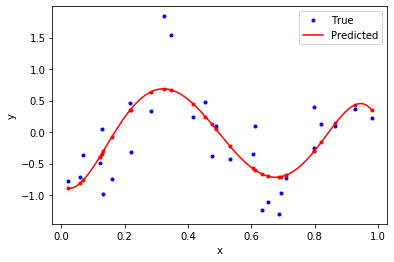

In [11]:
lambArray = np.exp(np.arange(-20,-5,0.1))
dArray = np.arange(1,20)

MSEValMin = 1
dMin = 0
lambMin = 0

for j in range(dArray.shape[0]):
    for i in range(lambArray.shape[0]):
        MSEVal = PolyRegWRidge(dArray[j], lambArray[i], X, y, X_val, y_val)[2]
        if (MSEVal < MSEValMin):
            MSEValMin = MSEVal
            dMin = dArray[j]
            lambMin = lambArray[i]
            
print(f"MSE val min = {MSEValMin}, d min = {dMin}, lambda min = {lambMin}")
pipe, trainRMSE, testRMSE = PolyRegWRidge(dMin, lambMin, X, y, X_val, y_val)
print(f"Train RMSE: {trainRMSE}  Test RMSE: {testRMSE}")
plot_prediction(pipe, X, y)

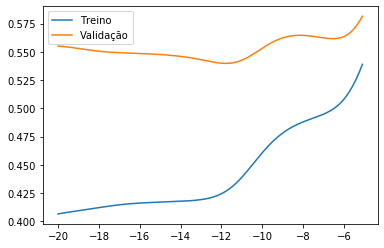

In [13]:
lambArray = np.exp(np.arange(-20, -5, 0.1))
MSETrainArray = np.zeros(lambArray.shape[0])
MSEValArray = np.zeros(lambArray.shape[0])

for i in range(lambArray.shape[0]):
    MSETrainArray[i], MSEValArray[i] = PolyRegWRidge(12, lambArray[i], X, y, X_val, y_val)[1:]
    
plt.plot(np.log(lambArray), MSETrainArray)
plt.plot(np.log(lambArray), MSEValArray)

plt.legend(["Treino", "Validação"])

# 4. (OPCIONAL) Implementação em Python

Finalmente, você irá escrever sua própria implementação dos modelos acima, usando uma interface parcialmente compatível com a biblioteca `sklearn`. Além das funções `fit()` e `predict()`, a classe do modelo deverá conter uma função `mse()` para cálculo do MSE (ao invés da função `score()` do `sklearn`).

É suficiente implementar um modelo de regressão linear com atributos polinomiais de grau $d$ e regularização $\ell_2$ com parâmetro $\lambda$; caso se deseje um modelo sem atributos polinomiais (linear na variável de entrada) ou sem regularização, é suficiente fazer $d=1$ ou $\lambda=0$, respectivamente.

1. Complete a classe abaixo, preenchendo as linhas indicadas (ou fique à vontade para reimplementar da forma que desejar).
1. Teste-a com os comandos da célula seguinte, para garantir que sua implementação está correta.
1. Para este conjunto de dados, o que ocorre quando usamos $d \geq 10$ e $\lambda=0$? Por que isso ocorre? Isto deixa de ocorrer se usarmos $\lambda=10^{-12}$? Por quê?

#### Funções úteis:
```python
np.ones()
np.c_[]
np.diag()
np.r_[]
np.linalg.inv()
np.linalg.solve()
np.mean()
```

In [17]:
class Model():
    # Univariate linear regression with polinomial features and L2 regularization
    def __init__(self, d=1, lamb=0):
        # Initialization
        self.d = d
        self.lamb = lamb
        return
    
    def _add_powers(self, X):
        # Add powers of X (including a column of ones)
        X_new = np.ones((X.shape[0],1))
        for i in range(1,self.d+1):
            X_new = np.c_[X_new, X**i]
        return X_new
    
    def fit(self, X, y):
        X = self._add_powers(X)
        L = np.diag(np.r_[0, np.ones(X.shape[1]-1)])
        assert np.linalg.matrix_rank(X.T @ X + self.lamb*L) == X.shape[1], 'Singular matrix'
        self.w = np.linalg.inv(X.T @ X + self.lamb * L) @ (X.T @ y)
        return

    def predict(self, X):
        X = self._add_powers(X)
        y_pred = X @ self.w
        return y_pred
    
    def mse(self, X, y):
        J = np.mean((self.predict(X) - y) ** 2)
        return J

w = [ -1.53990017  15.05703958 -34.54693665  20.1283143    1.95724005]
w = [ -1.53990017  15.05703958 -34.54693665  20.1283143    1.95724005]
Training MSE  : 0.325534
Validation MSE: 0.335650


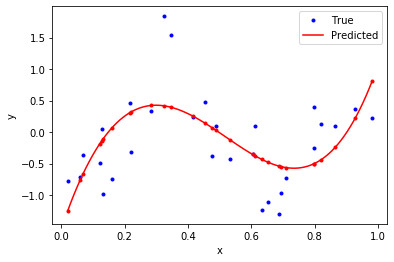

In [20]:
# scikit-learn
model = pipeline.make_pipeline(PolynomialFeatures(4, include_bias=False),Ridge(1e-5))
model.fit(X,y)
ridge = model.steps[1][1]
w = np.r_[ridge.intercept_, ridge.coef_]
print('w =',w)

# own implementation
model = Model(d=4, lamb=1e-5)
model.fit(X,y)
print('w =',model.w)
print('Training MSE  : %f' % model.mse(X,y));
print('Validation MSE: %f' % model.mse(X_val,y_val));
plot_prediction(model, X, y)
plt.show()

# 5. (OPCIONAL) Engenharia de atributos

1. Ao invés de adicionar inúmeros atributos polinomiais e regularização, tente adicionar **um único atributo** que melhor aproxime o conjunto de treinamento. Lembre que você pode introduzir qualquer função que desejar. No `sklearn` isso pode ser feito utilizando a classe abaixo, a qual pode ser integrada em uma *pipeline*.

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
class MyFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_new = np.c_[X, ???]
        return X_new

model = make_pipeline(MyFeatures(), LinearRegression())
model.fit(X, y)
print('Train MSE: %f' % mse(model, X, y));
print('  Val MSE: %f' % mse(model, X_val, y_val));
#print(' Test MSE: %f' % mse(model, X_test, y_test));
#plot_prediction(model, X, y)

Train MSE: 0.188547
  Val MSE: 0.269411
